STEPS:

**1.** upload file to Google drive

**2.** Click on mount drive button and mount googledrive

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Project_DB/Car details v3.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Observations:

**1.** Null values are present in mileage, engine, max_power,torque,seats.

**2.** Data is from year 1983 to 2020

**3.** Presence of outliers in numerical var namely year, selling price, km_driven, seats.

In [9]:
##null values cleaning
df["engine"].isnull().sum() ##221
df['engine'].value_counts()
print(df["engine"].isnull().sum())#221

# df["engine"].str.split(" CC")
df[["new_engine","engine_unit"]] = df["engine"].str.split(" ",0,expand = True)
# print("old ngine",df["engine"].value_counts())
# print("new engine",df["new_engine"].value_counts())

221


<ipython-input-9-22603043f78f>:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_engine","engine_unit"]] = df["engine"].str.split(" ",0,expand = True)


In [10]:
##null values cleaning
df["mileage"].isnull().sum() ##393
df['mileage'].value_counts()
print(df["mileage"].isnull().sum())#221

# df['new_new_mileage'] = [x.strip(" ") for x in df['mileage']]
# df

# df["engine"].str.split(" CC")
df[["new_mileage","mileage_unit"]] = df["mileage"].str.split(" ",0,expand = True)
df
# # print("old ngine",df["engine"].value_counts())
# # print("new engine",df["new_engine"].value_counts())

221


<ipython-input-10-4e07f25e4d96>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_mileage","mileage_unit"]] = df["mileage"].str.split(" ",0,expand = True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_engine,engine_unit,new_mileage,mileage_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,CC,23.4,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,CC,21.14,kmpl
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,CC,17.7,kmpl
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,CC,23.0,kmpl
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,CC,16.1,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,1197,CC,18.5,kmpl
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,1493,CC,16.8,kmpl
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,1248,CC,19.3,kmpl
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,1396,CC,23.57,kmpl


In [11]:
 ##null values cleaning
df["max_power"].isnull().sum() ##393
df['max_power'].value_counts()
print(df["max_power"].isnull().sum())#221
df['max_power']
df[["new_max_power","max_power_unit"]] = df["max_power"].str.split(" ",0,expand = True)
# df[["new_max_power","max_power_unit"]] = int(df["max_power"].str.split(" ",0,expand = True))
df.head()
# print("old ngine",df["engine"].value_counts())
# print("new engine",df["new_engine"].value_counts())

215


<ipython-input-11-50604e57fca3>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["new_max_power","max_power_unit"]] = df["max_power"].str.split(" ",0,expand = True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,new_engine,engine_unit,new_mileage,mileage_unit,new_max_power,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248,CC,23.4,kmpl,74,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498,CC,21.14,kmpl,103.52,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497,CC,17.7,kmpl,78,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396,CC,23.0,kmpl,90,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298,CC,16.1,kmpl,88.2,bhp


In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'new_engine', 'engine_unit', 'new_mileage', 'mileage_unit',
       'new_max_power', 'max_power_unit'],
      dtype='object')

In [13]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [14]:

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'new_engine', 'engine_unit', 'new_mileage', 'mileage_unit',
       'new_max_power', 'max_power_unit'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   object 
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   object 
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7913 non-null   o

In [16]:
df['new_engine'] = pd.to_numeric(df['new_engine'])
df['new_mileage'] = pd.to_numeric(df['new_mileage'])
df['new_max_power'] = pd.to_numeric(df['new_max_power'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   float64
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   float64
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7912 non-null   f

In [17]:
df.describe()

,year,selling_price,km_driven,seats,new_engine,new_mileage,new_max_power
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000,7912.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719,1458.625016,19.418783,91.517919
std,4.044249,8.062534e+05,5.655055e+04,0.959588,503.916303,4.037145,35.822499
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,624.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,1197.000000,16.780000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1248.000000,19.300000,82.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,1582.000000,22.320000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,3604.000000,42.000000,400.000000


In [18]:
df['new_engine'].isnull().sum()

221

In [19]:
# missing_values = df.isnull().sum()
# missing_values = missing_values[missing_values>0]
# missing_percent =  round(missing_values/len(df) , 4)*100
# pd.DataFrame({"Number of missing values":missing_values, "Percentage": missing_percent})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   object 
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  new_engine      7907 non-null   float64
 14  engine_unit     7907 non-null   object 
 15  new_mileage     7907 non-null   float64
 16  mileage_unit    7907 non-null   object 
 17  new_max_power   7912 non-null   f

# Here note that since we have already taken care of engine(in CC) , mileage and maxpower we will only consider new version of those features. so we will drop columns **mileage** , **engine** and **maxpower** columns for simplicity.
Also remove the units columns from df

In [21]:
df1 = df.drop(['engine','mileage','max_power','mileage_unit','max_power_unit','engine_unit'], axis =1)
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,new_engine,new_mileage,new_max_power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,1248.0,23.40,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,1498.0,21.14,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,1497.0,17.70,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,1396.0,23.00,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,1298.0,16.10,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,113.7Nm@ 4000rpm,5.0,1197.0,18.50,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,"24@ 1,900-2,750(kgm@ rpm)",5.0,1493.0,16.80,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,1248.0,19.30,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,140Nm@ 1800-3000rpm,5.0,1396.0,23.57,70.00


## 1.a checking which numerical variables are categorical



Step1: finidng number of unique values to identify categorical variable

In [22]:
# Extract numerical and non-numerical columns
numerical_col = df1.select_dtypes(include=['int64', 'float64']).columns
non_numerical_col = df1.select_dtypes(exclude=['int64', 'float64']).columns
print("numerical columns are:",numerical_col)
print("non numerical columns are",non_numerical_col)
print(len(numerical_col)+len(non_numerical_col), df1.shape)

numerical columns are: Index(['year', 'selling_price', 'km_driven', 'seats', 'new_engine',
       'new_mileage', 'new_max_power'],
      dtype='object')
non numerical columns are Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object')
13 (8128, 13)


Step2: Set a threshold to differentiate categorical variable

In [23]:
for column in df1[numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

year 29
selling_price 677
km_driven 921
seats 9
new_engine 121
new_mileage 381
new_max_power 319


In [24]:
categorical_threshold =9  # You can adjust this threshold based on your data

continuous_numerical_vars = []
categorical_numerical_vars = []

# Loop through the columns to classify variables
for column in df[numerical_col]:
    unique_count = df[column].nunique()

    if unique_count <= categorical_threshold:
        categorical_numerical_vars.append(column)
    else:
        continuous_numerical_vars.append(column)

In [25]:
print(categorical_numerical_vars)

['seats']


### 1.b Checking which non numeric variables are categorical




Step1: finidng number of unique values to identify categorical variable

In [26]:
for column in df1[non_numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

name 2058
fuel 4
seller_type 3
transmission 2
owner 5
torque 441


In [27]:
for column in df1[non_numerical_col]:
    unique_count = df1[column].nunique()
    print(column, unique_count)

name 2058
fuel 4
seller_type 3
transmission 2
owner 5
torque 441


In [28]:
df1['fuel'].value_counts(), df1['seller_type'].value_counts(),df1['transmission'].value_counts(),df1['owner'].value_counts()

(Diesel    4402
 Petrol    3631
 CNG         57
 LPG         38
 Name: fuel, dtype: int64,
 Individual          6766
 Dealer              1126
 Trustmark Dealer     236
 Name: seller_type, dtype: int64,
 Manual       7078
 Automatic    1050
 Name: transmission, dtype: int64,
 First Owner             5289
 Second Owner            2105
 Third Owner              555
 Fourth & Above Owner     174
 Test Drive Car             5
 Name: owner, dtype: int64)

In [29]:
categorical_threshold =5  # You can adjust this threshold based on your data

continuous_non_numerical_vars = []
categorical_non_numerical_vars = []

# Loop through the columns to classify variables
for column in df1[numerical_col]:
    unique_count = df1[column].nunique()

    if unique_count <= categorical_threshold:
        categorical_non_numerical_vars.append(column)
    else:
        continuous_non_numerical_vars.append(column)

In [30]:
print(categorical_non_numerical_vars)

[]


In [31]:
categorical_vars = categorical_numerical_vars + categorical_non_numerical_vars
len(categorical_vars)

1

In [32]:
continous_vars = continuous_non_numerical_vars+ continuous_numerical_vars
print(continous_vars)
len(continous_vars)

['year', 'selling_price', 'km_driven', 'seats', 'new_engine', 'new_mileage', 'new_max_power', 'year', 'selling_price', 'km_driven', 'new_engine', 'new_mileage', 'new_max_power']


13

In [33]:
len(df1.columns)
print(9+4)
print(len(df1.columns))

13
13


Before proceeding lets do the data validation.

## 2. Data Cleaning:

#### 1.Name

In [34]:
df1['name'].value_counts().sum()

8128

In [35]:
df1['name'].value_counts(sort = True)

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [36]:
# df1["BrandName"] = df1["name"].str.split(" ",0,expand = True)
# df1.colummns()
# df[["BrandName","NameDetails"]] = df1["name"].str.split(" ",0,expand = True)
df1['name'].nunique()

2058

This is a data of 2058 different cars. This column does not need cleaning.

### 2. torque

In [37]:
df1['torque'].nunique()
df1['torque'].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

We need to drop this column it has uneven data. Like there is no pattern found in the data.

In [38]:
df1 = df1.drop(['torque'],axis =1)

3. year

{'whiskers': [<matplotlib.lines.Line2D at 0x7d9761537070>,
 'caps': [<matplotlib.lines.Line2D at 0x7d97615375b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9761536dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9761537af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9761537d90>],
 'means': []}

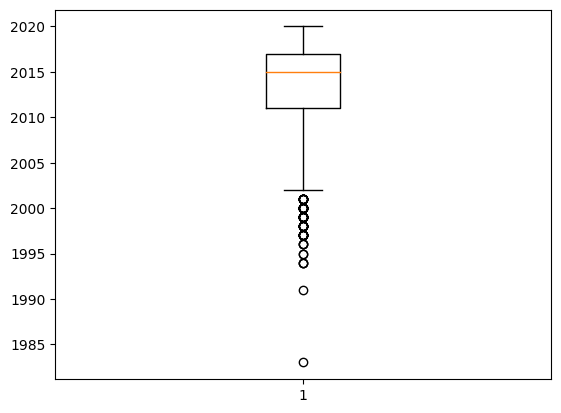

In [39]:
df1['year'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.year)


In [40]:
import numpy as np
column = 'year'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 1.00%


In [41]:
df1[column].quantile([0,.0001,.0001,.0002,.0003,.0004,.0005,.0006,.0007,.0008,.0009])

0.0000    1983.0000
0.0001    1989.5016
0.0001    1989.5016
0.0002    1992.8762
0.0003    1994.0000
0.0004    1994.0000
0.0005    1994.0635
0.0006    1994.8762
0.0007    1995.0000
0.0008    1995.5016
0.0009    1996.0000
Name: year, dtype: float64

In [42]:
df1['new_year']=df1['year']
mask1 =df1['year']<1992
df1['new_year'][mask1]=df1['year'].median()


<ipython-input-42-2ae8d3bce8e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_year'][mask1]=df1['year'].median()


{'whiskers': [<matplotlib.lines.Line2D at 0x7d97611f9000>,
 'caps': [<matplotlib.lines.Line2D at 0x7d97611f9540>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d97611e3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d97611f9a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d97611f9d20>],
 'means': []}

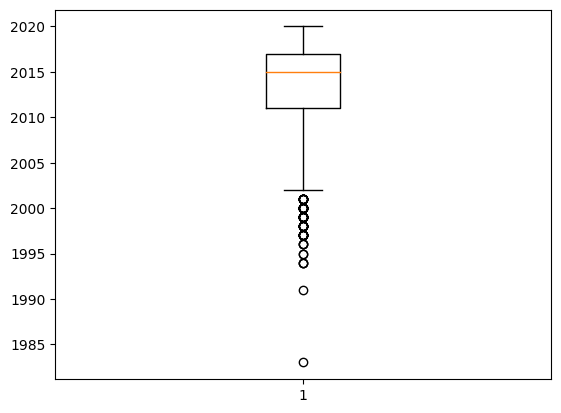

In [43]:
df1['year'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.year)


No further cleani g required.

4. selling price

In [44]:
df1['selling_price'].isnull().value_counts()


False    8128
Name: selling_price, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d975f0593c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d975f059900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d975f059120>],
 'medians': [<matplotlib.lines.Line2D at 0x7d975f059e40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d975f05a0e0>],
 'means': []}

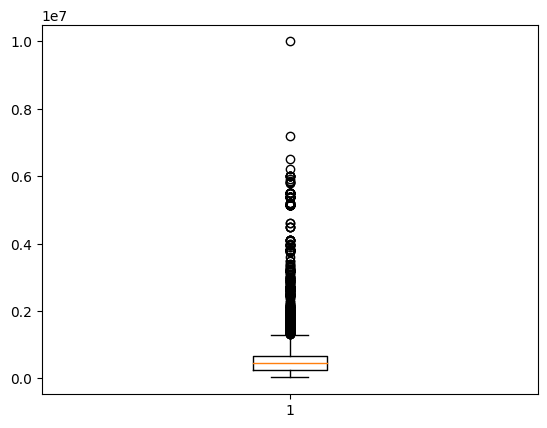

In [45]:
df1['selling_price'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.selling_price)


In [46]:
import numpy as np
column = 'selling_price'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 7.38%


In [47]:
df1[column].quantile([.90,.91,.92,.93,.94,.95,.95,.96,.97,.98,.99,1])

0.90     1025000.0
0.91     1100000.0
0.92     1224200.0
0.93     1400000.0
0.94     1650000.0
0.95     1950000.0
0.95     1950000.0
0.96     2475000.0
0.97     2900000.0
0.98     3800000.0
0.99     5200000.0
1.00    10000000.0
Name: selling_price, dtype: float64

We can choose 1950000.0 as benchmarkk for separation

In [48]:
df1['new_selling_price']=df1['selling_price']
mask1 =df1['selling_price']>1950000
df1['new_selling_price'][mask1]=df1['selling_price'].median()


<ipython-input-48-3b45261480d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_selling_price'][mask1]=df1['selling_price'].median()


### 5. km_driven

In [49]:
df1['km_driven'].value_counts(sort=True)

120000    536
70000     456
80000     448
60000     425
50000     391
         ... 
59635       1
123219      1
65300       1
39395       1
191000      1
Name: km_driven, Length: 921, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d975f0dcca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d975f0dd090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d975f0dca00>],
 'medians': [<matplotlib.lines.Line2D at 0x7d975f0dd600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d975f0dd8a0>],
 'means': []}

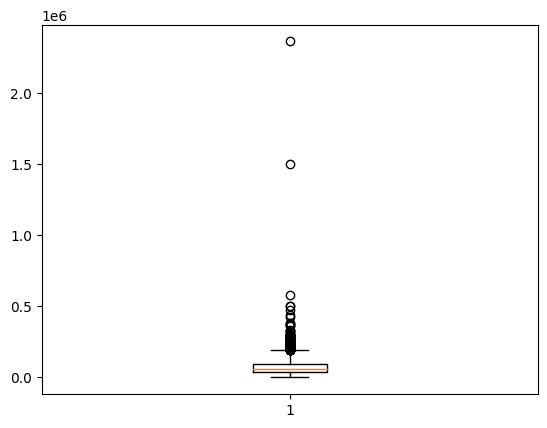

In [50]:
df1['km_driven'].value_counts(sort = True)
import matplotlib.pyplot as plt
plt.boxplot(df1.km_driven)


In [51]:
import numpy as np
column = 'km_driven'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 2.09%


In [52]:
df1[column].quantile([.90,.91,.92,.93,.94,.95,.95,.96,.97,.98,.99,1])

0.90     120000.00
0.91     120000.00
0.92     125980.16
0.93     136055.00
0.94     143000.00
0.95     150000.00
0.95     150000.00
0.96     160000.00
0.97     175000.00
0.98     195000.00
0.99     225000.00
1.00    2360457.00
Name: km_driven, dtype: float64

In [53]:
df1['new_km_driven']=df1['km_driven']
mask1 =df1['km_driven']>175000
df1['new_km_driven'][mask1]=df1['km_driven'].median()


<ipython-input-53-1d67cc4d1b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_km_driven'][mask1]=df1['km_driven'].median()


In [54]:
import numpy as np
column = 'new_km_driven'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")


Percentage of data with outliers: 0.23%


### 5. seats

In [55]:
df1['seats'].value_counts(sort=True)

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [56]:
import numpy as np
column = 'seats'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


### 6. new_engine

In [57]:
df1['new_engine'].value_counts()

1248.0    1017
1197.0     832
998.0      453
796.0      444
2179.0     389
          ... 
2835.0       1
1489.0       1
1422.0       1
2496.0       1
1950.0       1
Name: new_engine, Length: 121, dtype: int64

In [58]:
import numpy as np
column = 'new_engine'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


### 7. new_mileage

In [59]:
df1['new_mileage'].value_counts()

18.90    225
19.70    173
18.60    164
21.10    158
17.00    133
        ... 
17.42      1
18.24      1
10.71      1
21.76      1
16.51      1
Name: new_mileage, Length: 381, dtype: int64

In [60]:
import numpy as np
column = 'new_mileage'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")
print(df1[column].mean()-df[column].median())

Percentage of data with outliers: 0.00%
0.11878335651953975


### 8. new_max_power

In [61]:
df1['new_max_power'].value_counts()

74.00     377
88.50     222
81.80     220
67.00     165
46.30     162
         ... 
58.33       1
68.40       1
169.00      1
170.63      1
135.10      1
Name: new_max_power, Length: 319, dtype: int64

In [62]:
import numpy as np
column = 'new_max_power'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df1[column], 25)
Q3 = np.percentile(df1[column], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df1[column] if x < lower_bound or x > upper_bound]

# Calculate the percentage of data with outliers
percentage_with_outliers = (len(outliers) / len(df1[column])) * 100

print(f"Percentage of data with outliers: {percentage_with_outliers:.2f}%")

Percentage of data with outliers: 0.00%


In [63]:
print(df1['new_max_power'].mean()-df1['new_max_power'].median())

9.517918983822028


Done till now: name, torque, year,selling price, km_riven, new_engine,new_mileage,new_max_power

In [64]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'new_engine', 'new_mileage',
       'new_max_power', 'new_year', 'new_selling_price', 'new_km_driven'],
      dtype='object')

9.**Fuel**

In [65]:
df1['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

10.Seller type

In [66]:
df1['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

11.transimission

In [67]:
df1['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

12.owner

In [68]:
df1['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

### All above categorical variables don not need any cleaning, Data cleaning done

But, in oder to use it in model we need non numeric string variables to be converted into flags.

## 1. fuel needs to converted into flags Diesel ==1,Petrol=2 CNG=57 and LPG=4

In [69]:
df1['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [70]:
mask1 = df1['fuel']=='Diesel'
mask2 = df1['fuel']=='Petrol'
mask3 = df1['fuel']=='CNG'
mask4 = df1['fuel']=='LNG'

df1['fuel_flag']=1
df1['fuel_flag'][mask2] = 2
df1['fuel_flag'][mask3] = 3
df1['fuel_flag'][mask4] = 4

<ipython-input-70-e119fb2f6ef8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fuel_flag'][mask2] = 2
<ipython-input-70-e119fb2f6ef8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fuel_flag'][mask3] = 3
<ipython-input-70-e119fb2f6ef8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fuel_flag'][mask4] = 4


## 2. seller_type needs to be converted into flags

In [71]:
df1['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [72]:
mask1 = df1['seller_type']=='Individual'
mask2 = df1['seller_type']=='Dealer'
mask3 = df1['seller_type']=='Trustmark Dealer'

df1['seller_type_flag']=1
df1['seller_type_flag'][mask2] = 2
df1['seller_type_flag'][mask3] = 3


<ipython-input-72-da9ac73a8a55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['seller_type_flag'][mask2] = 2
<ipython-input-72-da9ac73a8a55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['seller_type_flag'][mask3] = 3


3.transmission needs to add flags

In [73]:
df1['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [74]:
mask1 = df1['transmission']=='Manual'
mask2 = df1['transmission']=='Automatic'


df1['transmission_flag']=1
df1['transmission_flag'][mask2] = 2



<ipython-input-74-dce8c9487a23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transmission_flag'][mask2] = 2


4. owner needs to add flags

In [75]:
df1['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [76]:
mask1 = df1['owner']=='First Owner'
mask2 = df1['owner']=='Second Owner'
mask3 = df1['owner']=='Third Owner'
mask4 = df1['owner']=='Fourth & Above Owner'
mask5 = df1['owner'] == 'Test Drive Car'

df1['owner_flag']=1
df1['owner_flag'][mask2] = 2
df1['owner_flag'][mask3] = 3
df1['owner_flag'][mask4] = 4
df1['owner_flag'][mask5] = 5

<ipython-input-76-845da064f133>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['owner_flag'][mask2] = 2
<ipython-input-76-845da064f133>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['owner_flag'][mask3] = 3
<ipython-input-76-845da064f133>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['owner_flag'][mask4] = 4
<ipython-input-76-845da064f133>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

### Model Building

In [77]:
print(df1.columns)
numerical_col,non_numerical_col,categorical_non_numerical_vars

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'new_engine', 'new_mileage',
       'new_max_power', 'new_year', 'new_selling_price', 'new_km_driven',
       'fuel_flag', 'seller_type_flag', 'transmission_flag', 'owner_flag'],
      dtype='object')


(Index(['year', 'selling_price', 'km_driven', 'seats', 'new_engine',
        'new_mileage', 'new_max_power'],
       dtype='object'),
 Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], dtype='object'),
 [])

In [78]:
import statsmodels.formula.api as sm
model = sm.ols(formula='selling_price ~ new_year + new_km_driven + seats + new_engine + new_mileage + new_max_power+fuel_flag + seller_type_flag + transmission_flag + owner_flag ', data=df1)
model
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1669.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:            -1.1432e+05
No. Observations:                7906   AIC:                         2.287e+05
Df Residuals:                    7895   BIC:                         2.287e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.538e+07   3.94e+06    -14.062      0.000   -6.31e+07   -4.77e+07
new_year             2.7e+04   1968.952     13.711      0.000    2.31e+04    3.09e+04
new_km_driven        -3.0743      0.177    -17.408      0.000      -3.420      -2.728
seats             -3.408e+04   8042.725     -4.238      0.000   -4.98e+04   -1.83e+04
new_engine           65.1799     23.341      2.792      0.005      19.425     110.935
new_mileage        1.349e+04   2081.682      6.482      0.000    9413.572    1.76e+04
new_max_power      1.324e+04    259.057     51.126      0.000    1.27e+04    1.38e+04
fuel_flag         -1.063e+05   1.42e+04     -7.480      0.000   -1.34e+05   -7.84e+04
seller_type_flag   8.622e+04   1.22e+04      7.065      0.000    6.23e+04     1.1e+05
transmission_flag  4.544e+05   1.99e+04     22.841      0.000    4.15e+05    4.93e+05
owner_flag         6533.2426   8529.911      0.766      0.444   -1.02e+04    2.33e+04
==============================================================================
Omnibus:                     4452.096   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75795.021
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                      17.428   Cond. No.                     5.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
import statsmodels.formula.api as sm
model = sm.ols(formula='selling_price ~ new_year + new_km_driven + seats + new_engine + new_mileage + new_max_power+fuel_flag + seller_type_flag + transmission_flag  ', data=df1)
model
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1855.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:            -1.1432e+05
No. Observations:                7906   AIC:                         2.287e+05
Df Residuals:                    7896   BIC:                         2.287e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.437e+07   3.71e+06    -14.659      0.000   -6.16e+07   -4.71e+07
new_year            2.65e+04   1858.212     14.260      0.000    2.29e+04    3.01e+04
new_km_driven        -3.0588      0.175    -17.435      0.000      -3.403      -2.715
seats             -3.411e+04   8042.425     -4.242      0.000   -4.99e+04   -1.83e+04
new_engine           64.8872     23.338      2.780      0.005      19.139     110.635
new_mileage        1.346e+04   2081.034      6.466      0.000    9376.749    1.75e+04
new_max_power      1.325e+04    259.028     51.141      0.000    1.27e+04    1.38e+04
fuel_flag         -1.063e+05   1.42e+04     -7.480      0.000   -1.34e+05   -7.84e+04
seller_type_flag   8.543e+04   1.22e+04      7.026      0.000    6.16e+04    1.09e+05
transmission_flag  4.546e+05   1.99e+04     22.854      0.000    4.16e+05    4.94e+05
==============================================================================
Omnibus:                     4460.726   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76290.576
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                      17.477   Cond. No.                     5.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
import statsmodels.formula.api as sm
model = sm.ols(formula='selling_price ~ new_year + new_km_driven + seats + new_mileage + new_max_power+fuel_flag + seller_type_flag + transmission_flag  ', data=df1)
model
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2084.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:            -1.1433e+05
No. Observations:                7906   AIC:                         2.287e+05
Df Residuals:                    7897   BIC:                         2.287e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.453e+07   3.71e+06    -14.697      0.000   -6.18e+07   -4.73e+07
new_year           2.661e+04   1858.602     14.315      0.000     2.3e+04    3.02e+04
new_km_driven        -3.0179      0.175    -17.255      0.000      -3.361      -2.675
seats              -2.36e+04   7101.688     -3.324      0.001   -3.75e+04   -9681.324
new_mileage        1.124e+04   1923.763      5.845      0.000    7472.959     1.5e+04
new_max_power      1.366e+04    212.664     64.226      0.000    1.32e+04    1.41e+04
fuel_flag         -1.224e+05    1.3e+04     -9.433      0.000   -1.48e+05    -9.7e+04
seller_type_flag   8.865e+04   1.21e+04      7.321      0.000    6.49e+04    1.12e+05
transmission_flag  4.557e+05   1.99e+04     22.903      0.000    4.17e+05    4.95e+05
==============================================================================
Omnibus:                     4428.805   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74284.849
Skew:                           2.329   Prob(JB):                         0.00
Kurtosis:                      17.276   Cond. No.                     5.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VIF


In [81]:
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [82]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,new_engine,new_mileage,new_max_power,new_year,new_selling_price,new_km_driven,fuel_flag,seller_type_flag,transmission_flag,owner_flag
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,1248.0,23.40,74.00,2014,450000,145500,1,1,1,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,1498.0,21.14,103.52,2014,370000,120000,1,1,1,2
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,1497.0,17.70,78.00,2006,158000,140000,2,1,1,3
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,1396.0,23.00,90.00,2010,225000,127000,1,1,1,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,1298.0,16.10,88.20,2007,130000,120000,2,1,1,1


In [83]:
#Calculating VIF values using that function
vif_cal(input_data=df1.drop(['name','seats','fuel','seller_type','transmission','owner','year','new_selling_price'],axis =1), dependent_col="selling_price")

km_driven  VIF =  1.87
new_engine  VIF =  4.05
new_mileage  VIF =  2.43
new_max_power  VIF =  2.79
new_year  VIF =  2.06
new_km_driven  VIF =  2.19
fuel_flag  VIF =  1.94
seller_type_flag  VIF =  1.21
transmission_flag  VIF =  1.65
owner_flag  VIF =  1.37


# Note:

### 1. VIF calculation should not have categorical variables and non numerical data columns

Now all VIF's are less than 5 hence build model using these columns finally.
So Final model has columns: km_driven,new_engine,new_mileage,new_max_power,new_year,new_km_driven,fuel_flag,seller_type_flag,transmission_flag,owner_flag

In [84]:
import statsmodels.formula.api as sm
model = sm.ols(formula='selling_price ~ km_driven + new_engine + new_mileage + new_max_power + new_year + new_km_driven + fuel_flag + seller_type_flag + transmission_flag + owner_flag', data=df1)
model
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1665.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:29:53   Log-Likelihood:            -1.1433e+05
No. Observations:                7906   AIC:                         2.287e+05
Df Residuals:                    7895   BIC:                         2.288e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.047e+07   3.87e+06    -13.034      0.000   -5.81e+07   -4.29e+07
km_driven            -0.2898      0.125     -2.318      0.020      -0.535      -0.045
new_engine           23.7549     20.735      1.146      0.252     -16.892      64.402
new_mileage        1.593e+04   2004.126      7.949      0.000     1.2e+04    1.99e+04
new_max_power       1.36e+04    242.801     56.019      0.000    1.31e+04    1.41e+04
new_year           2.445e+04   1930.252     12.667      0.000    2.07e+04    2.82e+04
new_km_driven        -2.8792      0.202    -14.228      0.000      -3.276      -2.482
fuel_flag         -1.007e+05   1.41e+04     -7.125      0.000   -1.28e+05    -7.3e+04
seller_type_flag   8.968e+04   1.22e+04      7.366      0.000    6.58e+04    1.14e+05
transmission_flag  4.649e+05   1.97e+04     23.573      0.000    4.26e+05    5.04e+05
owner_flag         7037.6090   8537.821      0.824      0.410   -9698.779    2.38e+04
==============================================================================
Omnibus:                     4438.438   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74965.230
Skew:                           2.333   Prob(JB):                         0.00
Kurtosis:                      17.346   Cond. No.                     8.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Accuracy of the model is 67%. This model can predict the price of car based on given data 67% accurately.

## Model Validation

In [85]:
import numpy  as np
from sklearn.model_selection import train_test_split # this package will help to sllit the data into desired parts

#I am trying to split my whole data into two parts train and test data with 80% in train data and remaining 20% in test data
X_train,X_test,Y_train,Y_test = train_test_split(df1,df1['selling_price'],train_size =.8)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
#in train  data we have 614 records with all variable 9 of them
#in test  data we have 154 records with all variable 9 of them


(6502, 19) (1626, 19) (6502,) (1626,)


In [89]:
#  km_driven + new_engine + new_mileage + new_max_power + new_year + new_km_driven + fuel_flag + seller_type_flag + transmission_flag + owner_flag'
features = [ 'km_driven','new_engine','new_mileage','new_max_power','new_year','new_km_driven','fuel_flag','seller_type_flag' ,'transmission_flag' , 'owner_flag']
print(features)
x_train = X_train[features]
y_train  = X_train['selling_price']

# for test data
x_test =X_test[features]
y_test = X_test['selling_price']

['km_driven', 'new_engine', 'new_mileage', 'new_max_power', 'new_year', 'new_km_driven', 'fuel_flag', 'seller_type_flag', 'transmission_flag', 'owner_flag']


In [93]:
import statsmodels.formula.api as sm
model = sm.ols(formula= y_train ~ x_train, data=df1)
model
fitted1 = model.fit()
fitted1.summary()

SyntaxError: ignored